# Welcome to the eFFT Quickstart Guide!

In this notebook, we'll guide you through the process of installing and using the **efft** Python library. If you're interested, you can also check out the [original eFFT paper](https://doi.org/10.1109/TPAMI.2024.3422209). Let's dive in!


For clarity, I'm running this in a virtual environment (venv):
```[bash]
python3 -m venv efftenv
source efftenv/bin/activate
pip install --upgrade pip
pip install notebook
```

Now, let's install the efft package from PyPI.

In [1]:
pip install -U efft --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.3 MB/s  0:00:00m 6.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 7.0 MB/s  0:00:027.0 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [efft]
Note: you may need to restart the kernel to use updated packages.


That was easy!

In [2]:
import sys
!python --version
!{sys.executable} -m pip show pip | grep Version | sed 's/Version: /pip /'
!{sys.executable} -m pip show numpy | grep Version | sed 's/Version: /numpy /'
!{sys.executable} -m pip show efft | grep Version | sed 's/Version: /efft /'

Python 3.12.3
pip 26.0.1
numpy 2.4.2
efft 1.0.5


Great! All the necessary packages are installed.

In [3]:
pip install -U -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from efft import Stimulus, Stimuli, eFFT
import matplotlib.pyplot as plt

def draw(image, spectrum):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the binary image
    axes[0].imshow(image, cmap='gray', interpolation='none')
    axes[0].set_title('Binary Image')
    axes[0].axis('off')
    
    # Plot the magnitude of the spectrum
    magnitude = np.fft.fftshift(np.abs(spectrum))
    axes[1].imshow(np.log1p(magnitude), cmap='viridis', interpolation='none')
    axes[1].set_title('FFT Spectrum (Log Scale)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

## 1) A Simple Example

Let's start with a simple example. We'll create an eFFT instance, apply a single stimulus, and then retrieve the current spectrum. It's that straightforward!


FFT shape: (64, 64) dtype: complex64


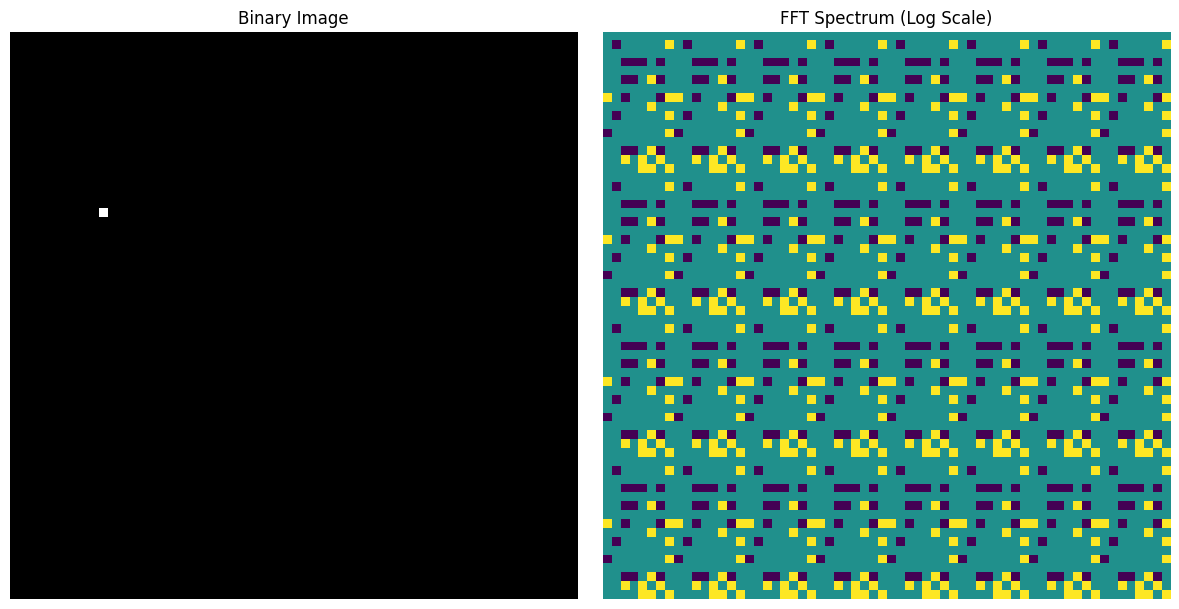

In [5]:
N = 64
F = eFFT(N)
F.initialize()

I = np.zeros((N, N), dtype=np.float32) # only for visualization

s = Stimulus(10, 20, True)
F.update(s)
X = F.get_fft()
print('FFT shape:', X.shape, 'dtype:', X.dtype)

I[s.col, s.row] = 1.0 # only for visualization

draw(I, X) # draw space image and frequency spectrum

We can also remove that stimulus.

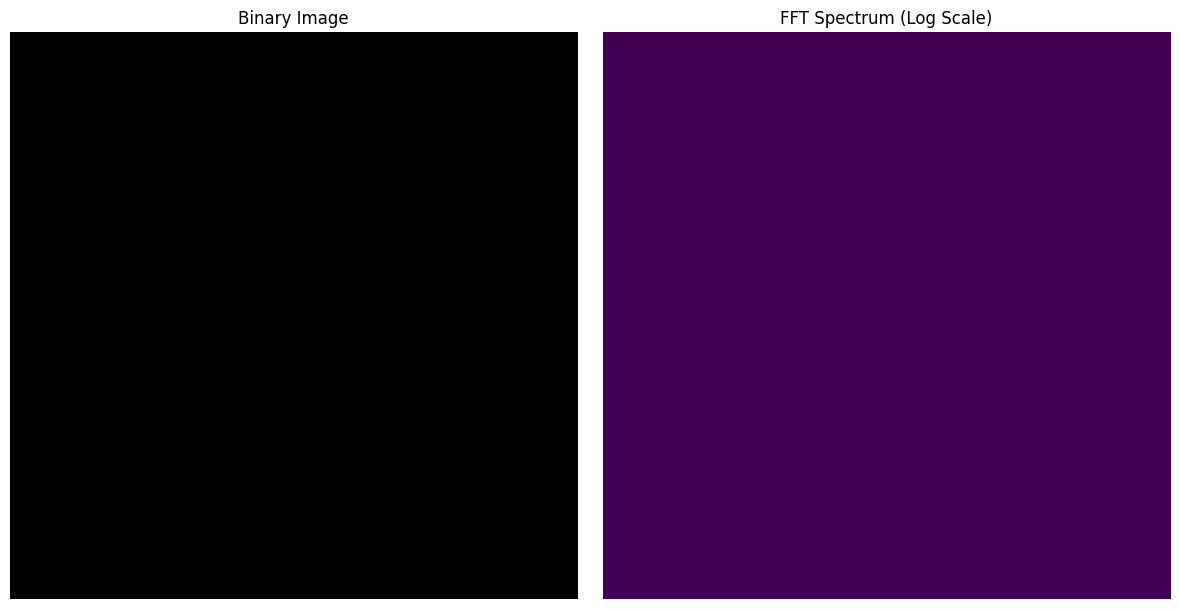

In [6]:
s = Stimulus(10, 20, False)
F.update(s)
X = F.get_fft()

I[s.col, s.row] = 0.0 # only for visualization

draw(I, X) # draw again

## 2) Batch Updates Made Easy

Want to apply multiple updates at once? Use `Stimuli` to handle a batch of updates in one go.


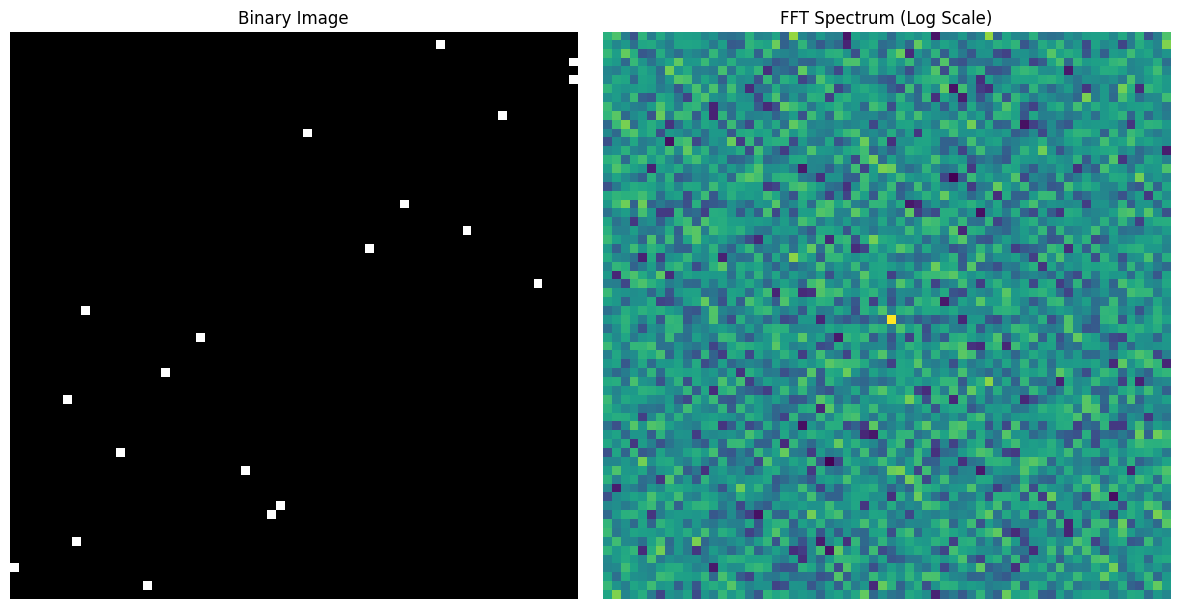

In [7]:
N = 64
F = eFFT(N)
F.initialize()

I = np.zeros((N, N), dtype=np.float32) # only for visualization

ss = Stimuli()
ss.append(Stimulus(12, 47, True))
ss.append(Stimulus(63, 5, True))
ss.append(Stimulus(29, 54, True))
ss.append(Stimulus(8, 31, True))
ss.append(Stimulus(44, 19, True))
ss.append(Stimulus(0, 60, True))
ss.append(Stimulus(51, 22, True))
ss.append(Stimulus(17, 38, True))
ss.append(Stimulus(63, 3, True))
ss.append(Stimulus(26, 49, True))
ss.append(Stimulus(33, 11, True))
ss.append(Stimulus(7, 57, True))
ss.append(Stimulus(40, 24, True))
ss.append(Stimulus(15, 62, True))
ss.append(Stimulus(55, 9, True))
ss.append(Stimulus(21, 34, True))
ss.append(Stimulus(48, 1, True))
ss.append(Stimulus(30, 53, True))
ss.append(Stimulus(6, 41, True))
ss.append(Stimulus(59, 28, True))

for s in ss:
    I[s.col, s.row] = 1.0 # only for visualization

F.update(ss)
X = F.get_fft()

draw(I, X)

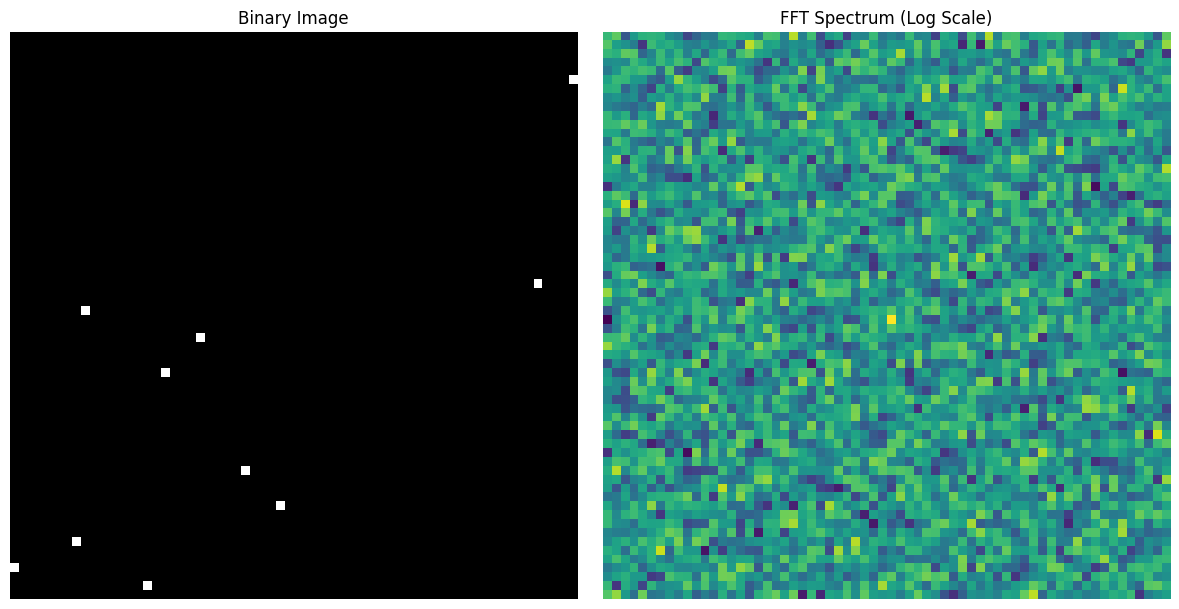

In [8]:
ss = Stimuli()
ss.append(Stimulus(12, 47, False))
ss.append(Stimulus(29, 54, False))
ss.append(Stimulus(44, 19, False))
ss.append(Stimulus(51, 22, False))
ss.append(Stimulus(63, 3, False))
ss.append(Stimulus(33, 11, False))
ss.append(Stimulus(40, 24, False))
ss.append(Stimulus(55, 9, False))
ss.append(Stimulus(48, 1, False))
ss.append(Stimulus(6, 41, False))

for s in ss:
    I[s.col, s.row] = 0.0 # only for visualization

F.update(ss)
X = F.get_fft()

draw(I, X)

## 3) Comparing eFFT with NumPy

The eFFT library keeps track of the 2D DFT. Here, we'll recreate the same state in NumPy and compare the results to ensure everything matches perfectly.


In [9]:
N = 64
F = eFFT(N)
F.initialize()

I = np.zeros((N, N), dtype=np.float32) # only for visualization

events = [
    (5, 5),
    (10, 20),
    (30, 12),
    (40, 40),
    (15, 8),
    (22, 35),
    (7, 28),
    (18, 3),
    (25, 17),
    (33, 9),
    (45, 21),
    (12, 44),
    (27, 30),
    (50, 6)
]

for (x, y) in events:
    F.update(Stimulus(y, x, True))

X_efft = F.get_fft()

I = np.zeros((N, N), dtype=np.complex64)
for (x, y) in events:
    I[y, x] = 1.0 # only for visualization

X_np = np.fft.fft2(I).astype(np.complex64)

err = np.linalg.norm(X_efft - X_np)
print('||eFFT - numpy||_F =', err)

||eFFT - numpy||_F = 5.5594573e-05


## 4) Randomized Testing

Let's generate some random stimuli and periodically check that the results match NumPy's FFT. This is a great way to ensure everything is functioning as expected.


In [10]:
rng = np.random.default_rng(0)
N = 32
steps = 2000
check_every = 200

F = eFFT(N)
F.initialize()
I = np.zeros((N, N), dtype=np.float32) # only for visualization

for k in range(1, steps + 1):
    x = int(rng.integers(0, N))
    y = int(rng.integers(0, N))
    on = bool(rng.integers(0, 2))
    F.update(Stimulus(y, x, on))
    I[y, x] = 1.0 if on else 0.0 # only for visualization

    if k % check_every == 0:
        X_efft = F.get_fft()
        X_np = np.fft.fft2(I).astype(np.complex64)
        rel = np.linalg.norm(X_efft - X_np) / (np.linalg.norm(X_np) + 1e-12)
        print(f'step {k:4d} | relative error = {rel:.3e}')

step  200 | relative error = 1.677e-07
step  400 | relative error = 1.698e-07
step  600 | relative error = 1.696e-07
step  800 | relative error = 1.651e-07
step 1000 | relative error = 1.633e-07
step 1200 | relative error = 1.503e-07
step 1400 | relative error = 1.472e-07
step 1600 | relative error = 1.456e-07
step 1800 | relative error = 1.413e-07
step 2000 | relative error = 1.348e-07


## 5) Real Data

Now let's work with real data. We'll use one of the sequences from the [Event-Camera Dataset](https://doi.org/10.1177/0278364917691115).


In [11]:
import os
import urllib.request
import zipfile
import numpy as np

URL = "https://download.ifi.uzh.ch/rpg/web/datasets/davis/shapes_translation.zip"
ZIP_PATH = "shapes_translation.zip"
EXTRACT_DIR = "shapes_translation"

# 1) Download
if not os.path.exists(ZIP_PATH):
    print(f"Downloading: {URL}")
    urllib.request.urlretrieve(URL, ZIP_PATH)
    print(f"Saved to: {ZIP_PATH}")
else:
    print(f"Zip already exists: {ZIP_PATH}")

# 2) Unzip
if not os.path.exists(EXTRACT_DIR) or not os.listdir(EXTRACT_DIR):
    print(f"Unzipping to: {EXTRACT_DIR}")
    os.makedirs(EXTRACT_DIR, exist_ok=True)
    with zipfile.ZipFile(ZIP_PATH, "r") as zf:
        zf.extractall(EXTRACT_DIR)
else:
    print(f"Extract dir already exists and is not empty: {EXTRACT_DIR}")

# Handle possible nested folder in the zip
def find_events_file(base_dir: str) -> str:
    cand = os.path.join(base_dir, "events.txt")
    if os.path.exists(cand):
        return cand
    for entry in os.listdir(base_dir):
        sub = os.path.join(base_dir, entry)
        if os.path.isdir(sub):
            cand = os.path.join(sub, "events.txt")
            if os.path.exists(cand):
                return cand
    raise FileNotFoundError(f"events.txt not found under {base_dir}")

events_path = find_events_file(EXTRACT_DIR)
print("events.txt:", events_path)

# 3) Load only events
events = np.loadtxt(events_path)
if events.ndim == 1:
    events = events[None, :]

t = events[:, 0]
x = events[:, 1].astype(np.int32)
y = events[:, 2].astype(np.int32)
p = events[:, 3].astype(np.int8)

N = 128
x_max = x.max()
y_max = y.max()
for k in range(len(t)):
    x[k] = int(x[k] / x_max * (N-1))
    y[k] = int(y[k] / y_max * (N-1))

print(f"Loaded events: {events.shape}")
print(f"t range: {float(t.min())}...{float(t.max())}")
print(f"x range: {int(x.min())}...{int(x.max())}")
print(f"y range: {int(y.min())}...{int(y.max())}")
print(f"p values: {np.unique(p)}")

Downloading: https://download.ifi.uzh.ch/rpg/web/datasets/davis/shapes_translation.zip
Saved to: shapes_translation.zip
Unzipping to: shapes_translation
events.txt: shapes_translation/events.txt
Loaded events: (17363976, 4)
t range: 0.0...59.736244
x range: 0...127
y range: 0...127
p values: [0 1]


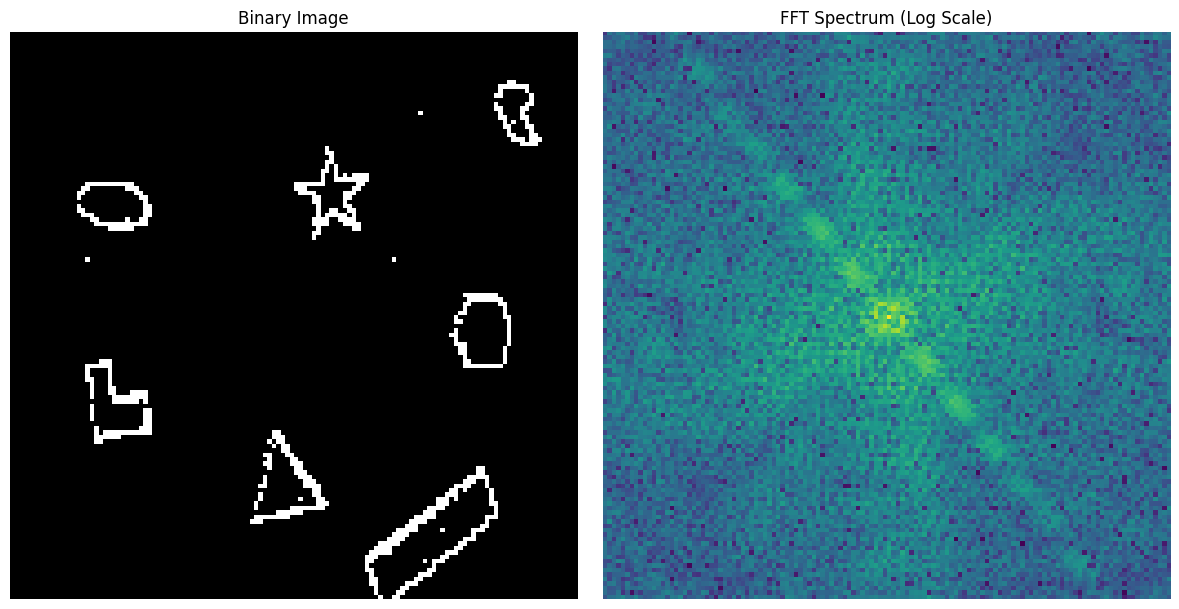

In [12]:
N = 128
F = eFFT(N)
F.initialize()
I = np.zeros((N, N), dtype=np.float32) # only for visualization

tvec = t[(t >= 0.10) & (t <= 0.15)]
xvec = x[(t >= 0.10) & (t <= 0.15)]
yvec = y[(t >= 0.10) & (t <= 0.15)]

for k in range(len(tvec)):
    I[yvec[k], xvec[k]] = 1.0 # only for visualization
    F.update(Stimulus(yvec[k], xvec[k], True))

draw(I, F.get_fft())

Now, let's use a sliding buffer.

Draw at iter=41680


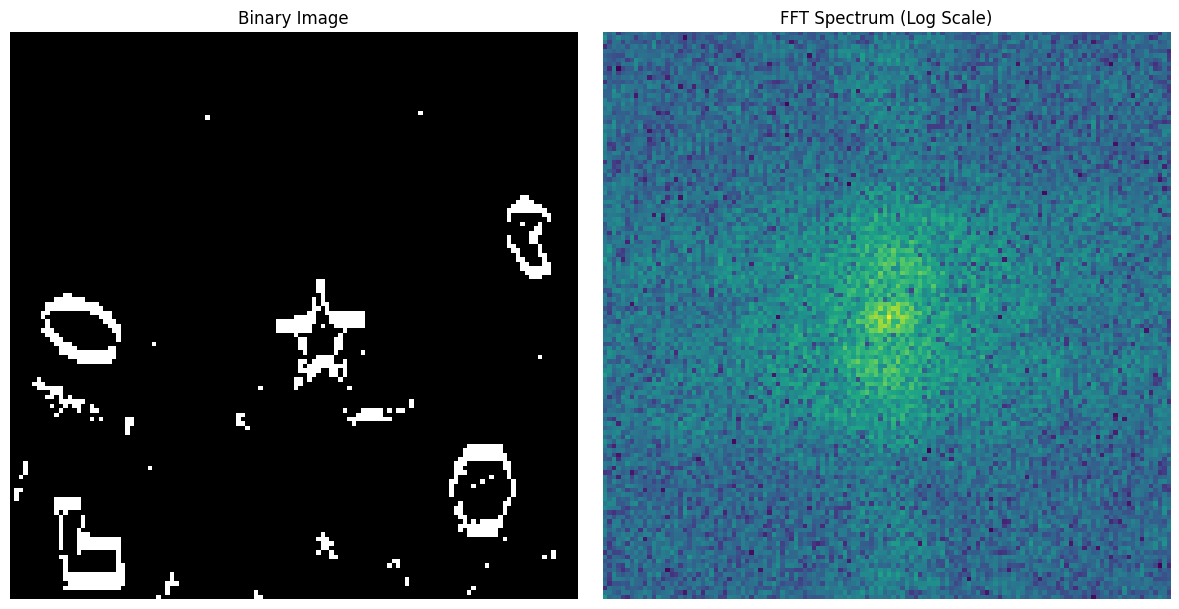

Draw at iter=83361


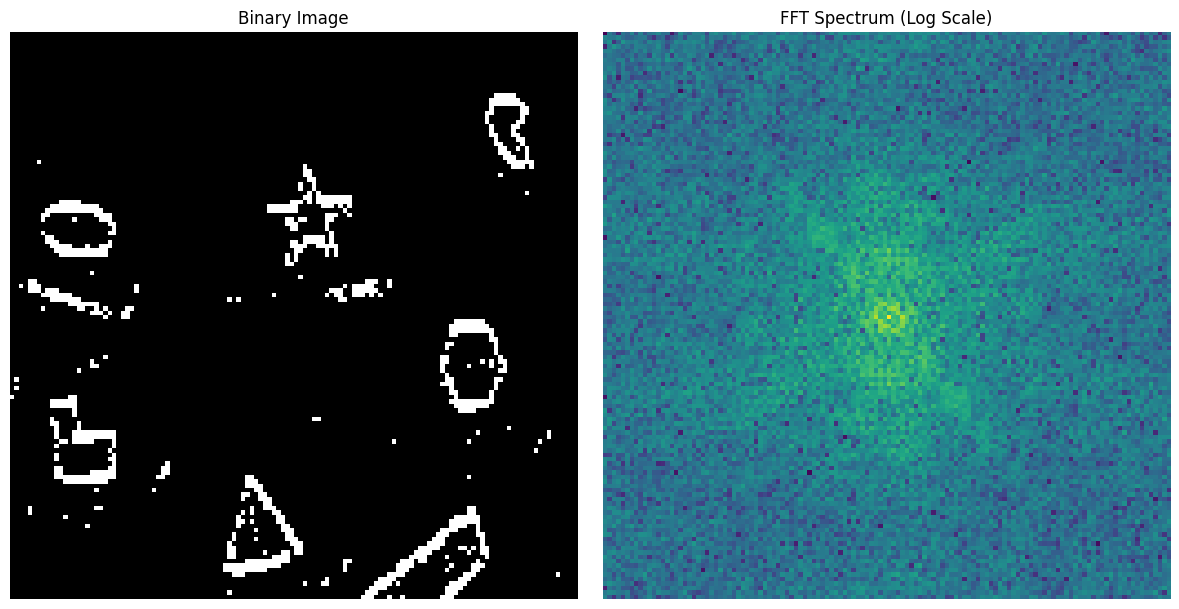

Draw at iter=125042


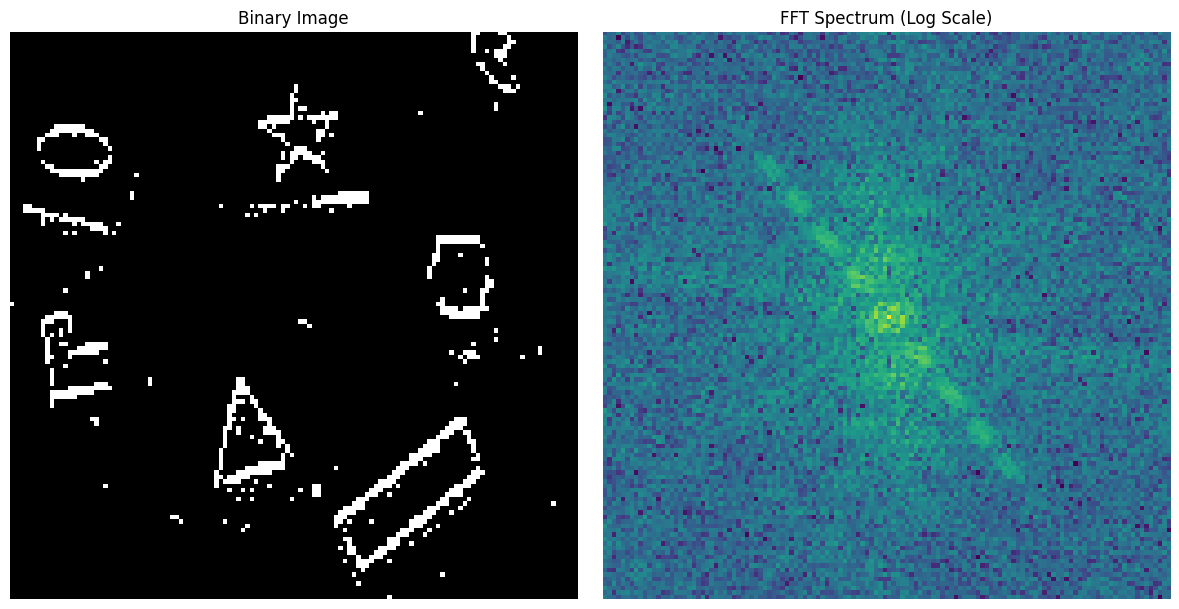

Draw at iter=166723


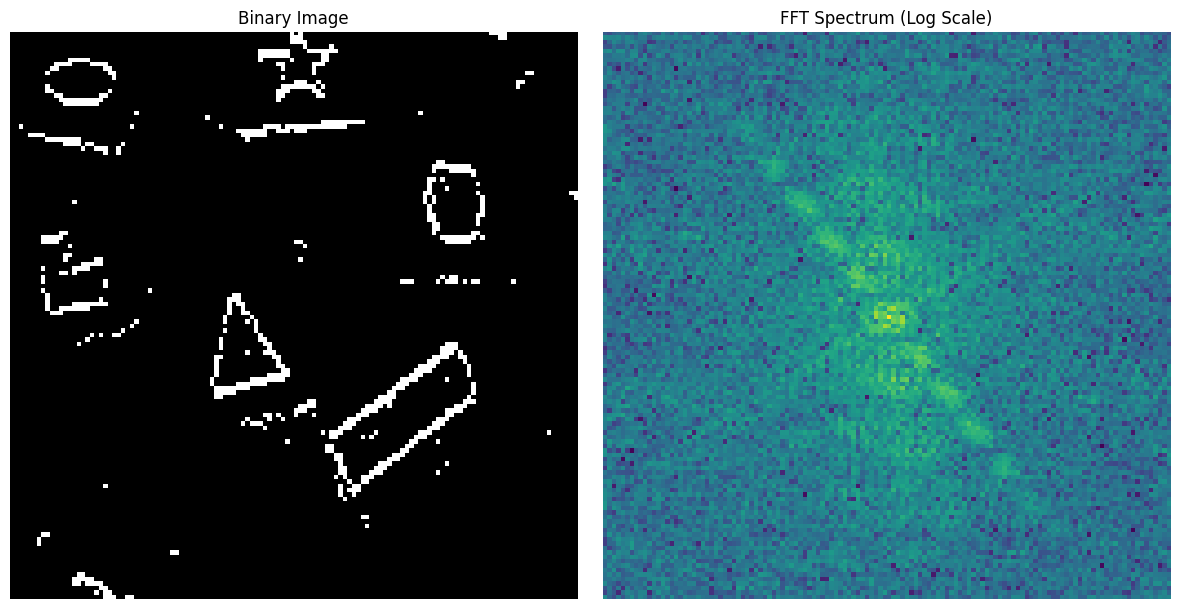

Draw at iter=208404


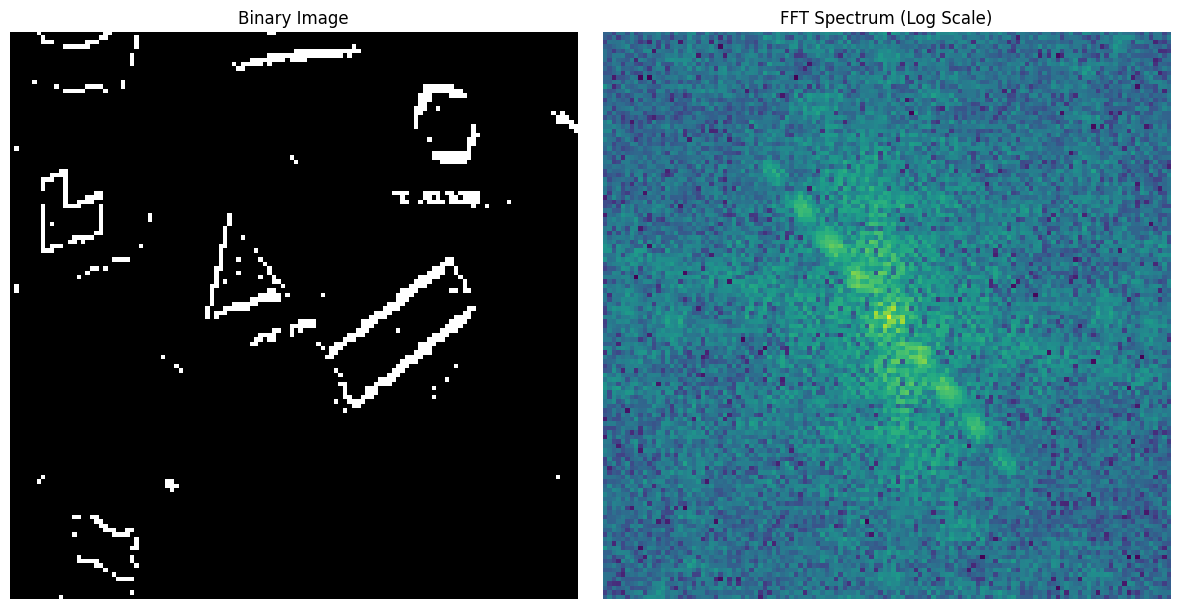

In [13]:
from collections import deque

N = 128
F = eFFT(N)
F.initialize()
I = np.zeros((N, N), dtype=np.float32) # only for visualization

event_buffer = deque()
windows_size = 5000

tvec = t[(t >= 7.00) & (t <= 8.00)]
xvec = x[(t >= 7.00) & (t <= 8.00)]
yvec = y[(t >= 7.00) & (t <= 8.00)]
draw_indices = set(np.linspace(0, len(tvec) - 1, 6, dtype=int)[1:])

for k in range(len(tvec)):    
    I[yvec[k], xvec[k]] = 1.0 # only for visualization
    F.update(Stimulus(yvec[k], xvec[k], True))
    event_buffer.append((yvec[k], xvec[k]))
    
    if len(event_buffer) > windows_size:
        y_old, x_old = event_buffer.popleft()
        I[y_old, x_old] = 0.0 # only for visualization
        F.update(Stimulus(y_old, x_old, False))

    if k in draw_indices:
        print(f"Draw at iter={k}")
        draw(I, F.get_fft())